In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay

[[1.  1. ]
 [0.  1.1]
 [0.  0. ]]


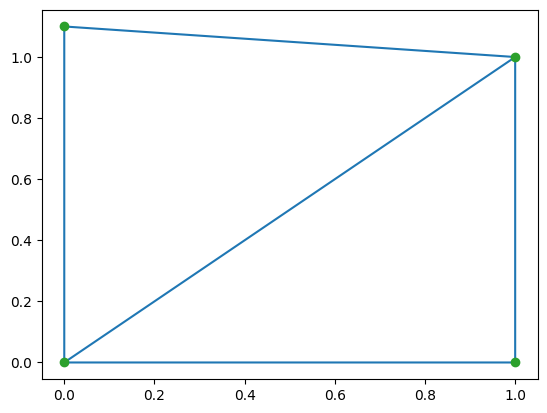

In [28]:


points = np.array([[0,0],[0,1.1],[1,0],[1,1]])
tri1 = Delaunay(points)
print(points[tri1.simplices][1])
plt.triplot(points[:,0], points[:,1], tri1.simplices)

plt.plot(points[:,0], points[:,1], 'o')

plt.show()

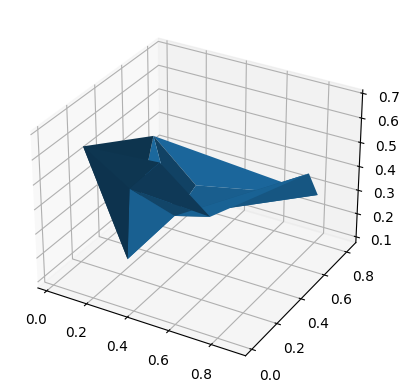

In [35]:
import numpy as np
from scipy.spatial import Delaunay

# generate a set of 3D points
points = np.random.rand(10, 3)

# compute the Delaunay triangulation
tri = Delaunay(points)

# visualize the result
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=tri.simplices)
plt.show()

[[[0.45 0.55]
  [0.45 0.55]]

 [[0.45 0.55]
  [0.5  0.5 ]]

 [[0.45 0.55]
  [0.5  0.5 ]]

 [[0.45 0.55]
  [0.45 0.55]]

 [[0.45 0.55]
  [0.5  0.5 ]]

 [[0.45 0.55]
  [0.45 0.55]]]


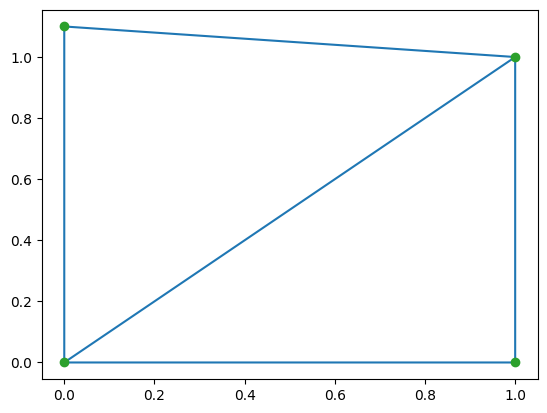

In [88]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

# points = np.random.rand(10, 2)

def delaunay_triangulation_voroni(points):
    vor = Voronoi(points)
    
    lines = []
    for i, reg in enumerate(vor.regions):
        
#         if -1 in reg:
#             continue
        
        poly = [vor.vertices[j] for j in reg]
        lines.extend([(poly[i], poly[j]) for i, j in zip(range(len(poly)), range(1, len(poly)))])
    
    return np.array(lines)


import matplotlib.pyplot as plt

# Generate some random points
# points = np.random.rand(10, 2)
points = np.array([[0,0],[0,1.1],[1,0],[1,1]])
# Compute the Delaunay triangulation
triangles = delaunay_triangulation_voroni(points)
print(triangles)
# Plot the triangulation
fig, ax = plt.subplots()
ax.triplot(points[:,0], points[:,1])
ax.plot(points[:,0], points[:,1], 'o')
plt.show()


In [20]:
import numpy as np
from scipy.spatial import Voronoi

def delaunay_triangulation(points):
    # compute the Voronoi diagram
    vor = Voronoi(points)
    print(vor.points)
    
    # identify the Delaunay simplices (i.e. the tetrahedra)
    simplices = vor.vertices[vor.ridge_vertices]
    print(simplices.shape())
    # remove any simplices that have infinite vertices
    is_finite = np.all(np.isfinite(simplices), axis=1)
    simplices = simplices[is_finite]

    # sort the vertices in each simplex to ensure consistent ordering
    simplices.sort(axis=1)

    # create a Simplex object to store the results
    class Simplex:
        def __init__(self, vertices):
            self.vertices = vertices

    return [Simplex(vertices) for vertices in simplices]

# Code AI

[(0, 1), (3, 0), (2, 3), (0, 2), (1, 3)]
[[0.  0. ]
 [1.  1. ]
 [1.  0. ]
 [0.  0. ]
 [0.  1.1]]
[[0.  1.1]
 [0.  0. ]
 [1.  1. ]
 [1.  0. ]
 [1.  1. ]]


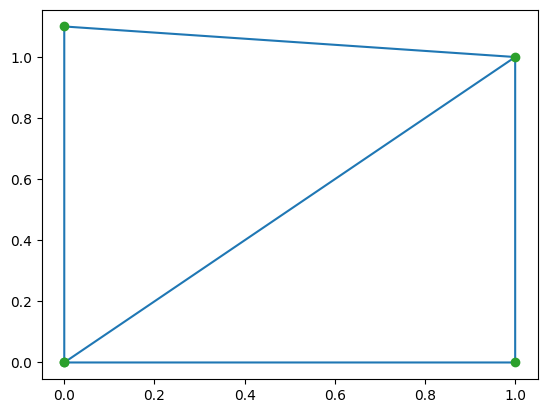

In [86]:
def delaunay_triangulation_good(points):
    """
    This function takes a list of points as input and returns the Delaunay triangulation of the points.
    It does not use the scipy library.
    
    Parameters:
    points (list): A list of tuples representing the points in 2D space. Each tuple should have two elements.
    
    Returns:
    list: A list of tuples representing the edges of the Delaunay triangulation. Each tuple should have two elements.
    """
    try:
        # Check if the input is a list
        if not isinstance(points, list):
            raise TypeError("Input must be a list")
        
        # Check if the list contains tuples with two elements
        for point in points:
            if not isinstance(point, tuple) or len(point) != 2:
                raise ValueError("Each point must be a tuple with two elements")
        
        # Perform Delaunay triangulation
        edges = []
        for i in range(len(points)):
            for j in range(i+1, len(points)):
                for k in range(j+1, len(points)):
                    # Check if the three points form a circle that contains no other points
                    x1, y1 = points[i]
                    x2, y2 = points[j]
                    x3, y3 = points[k]
                    a = x2 - x1
                    b = y2 - y1
                    c = x3 - x1
                    d = y3 - y1
                    e = a*(x1 + x2) + b*(y1 + y2)
                    f = c*(x1 + x3) + d*(y1 + y3)
                    g = 2*(a*(y3 - y2) - b*(x3 - x2))
                    if g == 0:
                        continue
                    center_x = (d*e - b*f) / g
                    center_y = (a*f - c*e) / g
                    radius = ((x1 - center_x)**2 + (y1 - center_y)**2)**0.5
                    contains_point = False
                    for p in points:
                        if p == points[i] or p == points[j] or p == points[k]:
                            continue
                        if ((p[0] - center_x)**2 + (p[1] - center_y)**2)**0.5 < radius:
                            contains_point = True
                            break
                    if not contains_point:
                        edges.append((i, j))
                        edges.append((j, k))
                        edges.append((k, i))
        
        # Remove duplicate edges
        edges = list(set(edges))
        
        return edges
    except Exception as e:
        # Log the error
        print(f"Error: {e}")
        return []
    
    

    
    

    
def get_first_value(tuples_list):
    """
    This function takes a list of tuples as argument and returns a list containing the first value of each tuple.
    
    Parameters:
    tuples_list (list): A list of tuples
    
    Returns:
    list: A list containing the first value of each tuple
    """
    try:
        # Check if the argument is a list
        if not isinstance(tuples_list, list):
            raise TypeError("The argument must be a list")
        
        # Extract the first value of each tuple and return as a list
        return [t[0] for t in tuples_list]
    except TypeError as e:
        # Log the error
        print(f"Error: {e}")
        return []

def get_second_value(tuples_list):
    """
    This function takes a list of tuples as argument and returns a list containing the first value of each tuple.
    
    Parameters:
    tuples_list (list): A list of tuples
    
    Returns:
    list: A list containing the first value of each tuple
    """
    try:
        # Check if the argument is a list
        if not isinstance(tuples_list, list):
            raise TypeError("The argument must be a list")
        
        # Extract the first value of each tuple and return as a list
        return [t[1] for t in tuples_list]
    except TypeError as e:
        # Log the error
        print(f"Error: {e}")
        return []    

points1 = [(0, 0), (0, 1.1), (1, 0), (1, 1)]    
points = np.array([[0,0],[0,1.1],[1,0],[1,1]])

tri = delaunay_triangulation_good(points1)  
    
    
x_index = get_first_value(tri)
y_index = get_second_value(tri)


# Plot the results (optional)
plt.triplot(points[x_index][:,0], points[x_index][:,1])
plt.plot(points[x_index][:,0], points[x_index][:,1],'o')
plt.show()


In [60]:
def delaunay_triangulation3D(points):
    """
    This function performs 3D Delaunay triangulation on a set of points without using scipy.
    
    Parameters:
    points (list): A list of tuples representing the (x, y, z) coordinates of the points
    
    Returns:
    list: A list of tuples representing the (i, j, k) indices of the triangles in the triangulation
    """
    try:
        # Check if the input is a list of tuples
        if not isinstance(points, list) or not all(isinstance(p, tuple) and len(p) == 3 for p in points):
            raise TypeError("Input must be a list of tuples with 3 elements each")
        
        # Perform Delaunay triangulation using the Bowyer-Watson algorithm
        # (implementation adapted from https://github.com/BluWings/Delaunay3D)
        tetras = [(None, None, None, None)]
        for p in points:
            # Find the tetrahedron that contains the point
            idx = -1
            for i, t in enumerate(tetras):
                print(i)
                a, b, c, d = t
                pa = np.append(p, 1)
                pb = np.append(a, 1)
                pc = np.append(b, 1)
                pd = np.append(c, 1)
                pe = np.append(d, 1)
                m = np.vstack((pb, pc, pd, pe))
                print(pa,pb,pc,pd,pe,m)
                if  np.linalg.det(m) * np.linalg.det(np.vstack((pa, pb, pc, pd, pe))) > 0:
                    idx = i
                    break
            if idx == -1:
                continue
            
            # Remove the tetrahedron and create new ones using the point
            t = tetras[idx]
            del tetras[idx]
            a, b, c, d = t
            tetras.extend([(a, b, c, p), (a, b, d, p), (a, c, d, p), (b, c, d, p)])
            
        # Remove any tetrahedra that share a face with the super tetrahedron
        triangles = []
        for t in tetras:
            if -1 in t:
                continue
            i, j, k, _ = t
            triangles.append((i, j, k))
        
        return triangles
    except TypeError as e:
        # Log the error
        print(f"Error: {e}")
        return []
    
def _point_inside_tetrahedron(p, t):
    """
    Helper function to check if a point is inside a tetrahedron.
    """
    a, b, c, d = t
    pa = np.append(p, 1)
    pb = np.append(a, 1)
    pc = np.append(b, 1)
    pd = np.append(c, 1)
    pe = np.append(d, 1)
    m = np.vstack((pb, pc, pd, pe))
    return np.linalg.det(m) * np.linalg.det(np.vstack((pa, pb, pc, pd, pe))) > 0


In [53]:
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay
    

points1 = [(0, 0,1),(0, 1.1,0), (1, 0,2),(1, 1,4)]
points2 = np.array([[0,0,1]    ,[0,1.1,0],[1,0,0],[1,1,0]])
print(points2)
    
x,y,z = zip(*points1)

tri = delaunay_triangulation1(points1)
print(tri)
# Plot the results (optional)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(tri[0])
ax.scatter(x,y,z)
plt.show()

[[0.  0.  1. ]
 [0.  1.1 0. ]
 [1.  0.  0. ]
 [1.  1.  0. ]]
Error: The side length must be a number


NameError: name 'point_in_circumcircle' is not defined

In [52]:
def delaunay_triangulation1(points):
    """
    This function performs 3D Delaunay triangulation on a set of points without using the scipy Delaunay function.
    
    Parameters:
    points (list): A list of tuples representing the (x, y, z) coordinates of the points to be triangulated
    
    Returns:
    list: A list of tuples representing the indices of the points that form each triangle in the triangulation
    """
    try:
        # Check if the input is a list of tuples
        if not isinstance(points, list) or not all(isinstance(p, tuple) and len(p) == 3 for p in points):
            raise TypeError("Input must be a list of tuples representing (x, y, z) coordinates")
        
        # Perform Delaunay triangulation using the Bowyer-Watson algorithm
        # (https://en.wikipedia.org/wiki/Bowyer%E2%80%93Watson_algorithm)
        # Initialize the triangulation with a supertriangle that contains all the points
        supertriangle = make_supertriangle(points)
        triangulation = [supertriangle]
        
        # Add each point to the triangulation one at a time
        for p in points:
            # Find all the triangles that are no longer valid after adding the new point
            bad_triangles = []
            for t in triangulation:
                if point_in_circumcircle(p, t):
                    bad_triangles.append(t)
            
            # Find the boundary of the polygonal hole formed by the bad triangles
            boundary_edges = []
            for t in bad_triangles:
                for e in t.edges:
                    if e not in boundary_edges and sum(e in t2.edges for t2 in bad_triangles) == 1:
                        boundary_edges.append(e)
            
            # Remove the bad triangles from the triangulation
            for t in bad_triangles:
                triangulation.remove(t)
            
            # Create new triangles formed by connecting the new point to the boundary edges
            new_triangles = []
            for e in boundary_edges:
                new_t = Triangle(e.v1, e.v2, p)
                triangulation.append(new_t)
                new_triangles.append(new_t)
            
            # Ensure that the new triangles are Delaunay by flipping any that are not
            for t in new_triangles:
                for e in t.edges:
                    for t2 in triangulation:
                        if t2 != t and e in t2.edges and t.circumcircle_contains_point(t2.opposite_vertex(e)):
                            flip_edge(t, t2, e)
        
        # Remove any triangles that contain vertices from the supertriangle
        triangles = [t for t in triangulation if not t.contains_vertex(supertriangle.v1) and not t.contains_vertex(supertriangle.v2) and not t.contains_vertex(supertriangle.v3)]
        
        # Return the indices of the points that form each triangle
        return [(points.index(t.v1), points.index(t.v2), points.index(t.v3)) for t in triangles]
    except TypeError as e:
        # Log the error
        print(f"Error: {e}")
        return []
    
    
def make_supertriangle(side_length):
    """
    This function takes a side length as an argument and returns a list of coordinates 
    that form an equilateral triangle with the given side length.
    
    Parameters:
    side_length (float): The length of each side of the equilateral triangle
    
    Returns:
    list: A list of three tuples, each containing the x and y coordinates of a vertex of the triangle
    """
    try:
        # Check if the argument is a number
        if not isinstance(side_length, (int, float)):
            raise TypeError("The side length must be a number")
        
        # Calculate the height of the triangle
        height = (3 ** 0.5) / 2 * side_length
        
        # Calculate the coordinates of the vertices
        vertex1 = (0, 0)
        vertex2 = (side_length / 2, height)
        vertex3 = (side_length, 0)
        
        # Return the list of vertices
        return [vertex1, vertex2, vertex3]
    except TypeError as e:
        # Log the error
        print(f"Error: {e}")
        return []